In [1]:
import pandas as pd
from datasets import list_datasets

C:\Users\lavanya\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
all_datasets = list_datasets()

In [4]:
len(all_datasets)

60638

In [5]:
'dair-ai/emotion' in all_datasets

True

In [6]:
from datasets import load_dataset
emotion = load_dataset('emotion')

In [7]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
emotion.set_format(type = 'pandas')
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
df = emotion['train'][:]
df = df.head(100)
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
95,i feel like throwing away the shitty piece of ...,0
96,im starting to feel wryly amused at the banal ...,1
97,i find every body beautiful and only want peop...,1
98,i hear are owners who feel victimized by their...,0


In [10]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [11]:
df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Dataset Analysis

In [12]:
import matplotlib.pyplot as plt

In [13]:
df['label_name'].value_counts()

label_name
joy         35
sadness     27
anger       19
fear         8
love         7
surprise     4
Name: count, dtype: int64

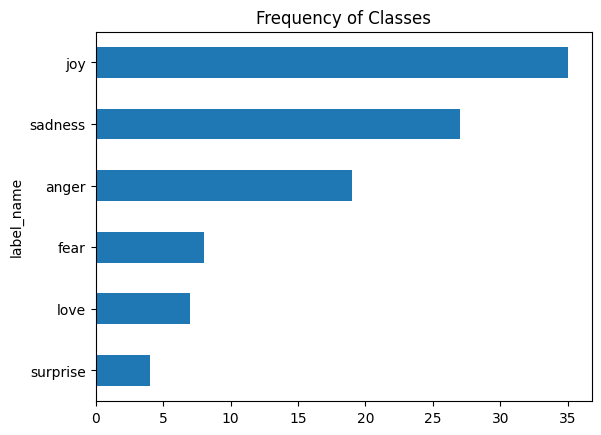

In [14]:
label_counts = df['label_name'].value_counts(ascending = True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [15]:
# above data is imbalance

In [16]:
df['text'].str.split().apply(len)

0      4
1     21
2     10
3     18
4      4
      ..
95    11
96    17
97    15
98    17
99    41
Name: text, Length: 100, dtype: int64

In [17]:
df['words_per_tweet'] = df['text'].str.split().apply(len)
df

,text,label,label_name,words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
95,i feel like throwing away the shitty piece of ...,0,sadness,11
96,im starting to feel wryly amused at the banal ...,1,joy,17
97,i find every body beautiful and only want peop...,1,joy,15
98,i hear are owners who feel victimized by their...,0,sadness,17


<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

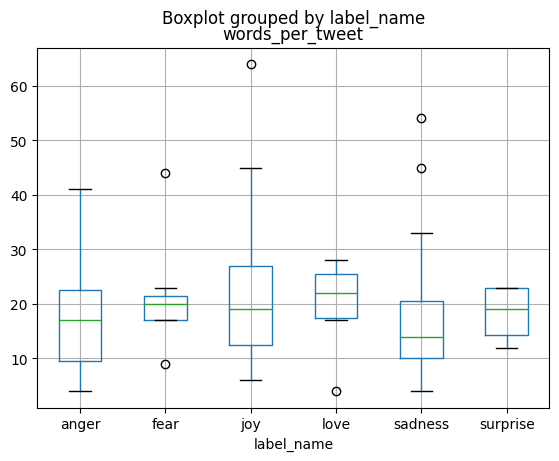

In [18]:
df.boxplot('words_per_tweet', by = 'label_name')

In [19]:
from transformers import AutoTokenizer

In [20]:
model = "distilbert-base-uncased"

In [21]:
tokenizer = AutoTokenizer.from_pretrained(model)

In [22]:
text = "I love Machine Learning. Tokenization is awesome"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 1012, 19204, 3989, 2003, 12476, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'i',
 'love',
 'machine',
 'learning',
 '.',
 'token',
 '##ization',
 'is',
 'awesome',
 '[SEP]']

In [24]:
tokenizer.vocab_size

30522

In [25]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

#### tokenization of emotion data

In [26]:
emotion.reset_format()
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [27]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding = True, truncation = True)
    return temp
print(tokenize(emotion['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
emotions_encoded = emotion.map(tokenize, batched = True, batch_size = None)

In [29]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Model Building

In [30]:
inputs = tokenizer(text, return_tensors = 'pt')
inputs

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,  1012, 19204,  3989,  2003, 12476,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [31]:
from transformers import AutoModel
import torch

In [32]:
model1 = AutoModel.from_pretrained(model)

In [33]:
model1

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [34]:
with torch.no_grad():
    outputs = model1(**inputs)
    
last_hidden_states = outputs.last_hidden_state

In [35]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.0743, -0.1569, -0.2934,  ..., -0.0299,  0.3642,  0.5066],
         [ 0.5919,  0.1188, -0.4230,  ...,  0.0680,  0.5788,  0.4194],
         [ 0.7722,  0.6527,  0.2959,  ..., -0.0121,  0.3875,  0.2190],
         ...,
         [-0.0937,  0.0054, -0.0308,  ...,  0.0323,  0.1304,  0.5123],
         [ 0.3475, -0.1591, -0.0551,  ...,  0.1163, -0.0405, -0.0013],
         [ 0.9135,  0.2152, -0.5224,  ...,  0.1339, -0.5889, -0.2390]]]), hidden_states=None, attentions=None)

In [36]:
last_hidden_states.shape

torch.Size([1, 11, 768])

In [37]:
from transformers import AutoModelForSequenceClassification

In [38]:
num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = AutoModelForSequenceClassification.from_pretrained(model, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
device

device(type='cpu')

In [40]:
from transformers import TrainingArguments

In [41]:
batch_size = 64
model_name = "distilbert-finetuned-emotion"

In [42]:
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=1,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False)


In [43]:
from sklearn.metrics import accuracy_score, f1_score

In [44]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1) 
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}


In [45]:
from transformers import Trainer

trainer = Trainer(model = model1, args = training_args,
                 compute_metrics = compute_metrics,
                 train_dataset = emotions_encoded['train'],
                 eval_dataset = emotions_encoded['validation'],
                 tokenizer = tokenizer)

In [46]:
trainer.train()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lavanyalavanya41326. Use `wandb login --relogin` to force relogin


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.525570,0.832000,0.813566


TrainOutput(global_step=250, training_loss=0.9338104858398437, metrics={'train_runtime': 4019.6512, 'train_samples_per_second': 3.98, 'train_steps_per_second': 0.062, 'total_flos': 360171430848000.0, 'train_loss': 0.9338104858398437, 'epoch': 1.0})

In [47]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.5047145485877991,
 'test_accuracy': 0.8505,
 'test_f1': 0.8334924696458051,
 'test_runtime': 111.4073,
 'test_samples_per_second': 17.952,
 'test_steps_per_second': 0.287}

In [48]:
import numpy as np

In [49]:
y_preds = np.argmax(preds_outputs.predictions, axis = 1)
y_true = emotions_encoded['test'][:]['label']

In [50]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       581
           1       0.85      0.96      0.90       695
           2       0.86      0.43      0.58       159
           3       0.84      0.79      0.81       275
           4       0.74      0.87      0.80       224
           5       1.00      0.09      0.17        66

    accuracy                           0.85      2000
   macro avg       0.87      0.68      0.70      2000
weighted avg       0.86      0.85      0.83      2000



In [51]:
label_counts

label_name
surprise     4
love         7
fear         8
anger       19
sadness     27
joy         35
Name: count, dtype: int64

In [54]:
text = 'I love Machine Learning. Tokenization is awesome'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model1(**input_encoded)  # Use model1 here

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]


(1, 'joy')